In [316]:
# Importer des libairies utilisables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns

In [317]:
# Importer des données et les transformer en DataFrame pandas à partir de fichier csv

df = pd.read_csv('openfoodfacts.csv', sep = '\t')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,8,13,19,20,21,27,28,29,31,32,33,38,40,41,42,43,52,55,64,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [318]:
# Suppression des colonnes avec plus de 80% de valeurs manquantes

df = df.loc[:, df.isnull().mean() <.80]

In [319]:
# Affichage du pourcentage de donneés manquantes
df.isnull().mean() * 100

code                                                      0.000000
url                                                       0.000000
creator                                                   0.000199
created_t                                                 0.000000
created_datetime                                          0.000000
last_modified_t                                           0.000000
last_modified_datetime                                    0.000000
product_name                                              4.091823
quantity                                                 75.099121
brands                                                   48.546725
brands_tags                                              48.550156
categories                                               53.546919
categories_tags                                          53.547218
categories_en                                            53.547218
labels                                                   78.59

In [320]:
# Visualiser l'information (type, nombre de colonne et de ligne, ...)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011182 entries, 0 to 2011181
Data columns (total 56 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   code                                                   object 
 1   url                                                    object 
 2   creator                                                object 
 3   created_t                                              int64  
 4   created_datetime                                       object 
 5   last_modified_t                                        int64  
 6   last_modified_datetime                                 object 
 7   product_name                                           object 
 8   quantity                                               object 
 9   brands                                                 object 
 10  brands_tags                                            object 
 11

In [321]:
# Choisir manuellement des indicateurs pertinents et intéressants pour ce projet,

df = df[['code', 'last_modified_datetime', 'product_name', 'categories', 'brands', 'countries',
        'additives_n', 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 
        'nutriscore_score','nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 
        'main_category', 'image_url', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 
        'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']]

In [322]:
# Suppression des ligne avec plus de 80% de valeurs manquantes

df_T = df.T
df_T = df_T.loc[:, df_T.isnull().mean() <.80]
df = df_T.T

In [323]:
# Suppression des ligne manquant l'information sur le pays de produit

df = df[~df.countries.isna()]

In [324]:
countries_translate ={
    "France" : "France",
    "Francia" : "France",
    "Frankreich" : "France",
    "fr" : "France",
    "Germany" : "Allemagne",
    "Deutschland" : "Allemagne",
    "de" : "Allemagne",
    "España" : "Espagne",
    "Spain" : "Espagne",
    "en:es" : "Espagne",
    "United States" : "Etats-Unis",
    "USA" : "Etats-Unis",
    "Us" : "Etats-Unis",
    "United Kingdom" : "Royaume-Uni",
    "united-kingdom" : "Royaume_Uni",
    "England" : "Angleterre",
    "Scotland" : "Ecosse",
    "Ireland" : "Irlande",
    "Wales" : "Pays de Galles",
    "Polska" : "Pologne",
    "México" : "Mexique",
    "mexico" : "Mexique",
    "Belgium" : "Belgique",
    "be" : "Belgique",
    "Netherlands" : "Pays-Bas",
    "Magyarország" : "Hongrie",
    "Hungary" : "Hongrie",
    "new caledonia" : "Nouvelle-Calédonie",
    "Switzerland" : "Suisse",
    "Sverige" : "Suède",
    "Sweden" : "Suède",
    "Norway" : "Norvège",
    "Norge" : "Norvège",
    "Suomi" : "Finlande",
    "Finland" : "Finlande",
    "Bulgaria" : "Bulgarie",
    "България" : "Bulgarie",
    "Bǎlgarija" : "Bulgarie",
    "Россия" : "Russie",
    "Russia" : "Russie",
    "Italy" : "Italie",
    "Italia" : "Italie",
    "Thailand" : "Thaïlande",
    "Canada" : "Canada",
    "Brazil" : "Brésil",
    "Réunion" : "France",
    "Républik kongo" : "République du Congo",
    "Republik kongo" : "République du Congo",
    "Congo" : "République du Congo",
    "Mo" : "Macao",
    "malaysia" : "Malaisie",
    "my" : "Malaisie",
    "singapore" : "Singapour",
    "Jemen" : "Yémen",
    "mali" : "Mali",
    "Burkina faso" : "Burkina Faso",
    "En:sr" : "Singapour",
    "En:ye" : "Yémen",
    "Nueva zelanda" : "Nouvelle-Zélande",
    "New Zealand" : "Nouvelle-Zélande",
    "Taiwan" : "Taiwan",
    "Sn" : "Sénégal",
    "Senegal" : "Sénégal",
    "Grecia" : "Grèce",
    "Ελλάδα " : "Grèce",
    "Nueva caledonia" : "Nouvelle Calédonie",
    "lu" : "Luxembourg",
    "united-states" : "Etats-Unis",
    "En:it" : "Italie",
    "En:ivory coast" : "Cote d'Ivoire",
    "Schweiz" : "Suisse",
    "Slovenia" : "Slovénie",
    "ફ્રાન્સ" : "France",
    "En:ae" : "Emirats arabes unis",
    "united arab emirates" : "Emirats arabes unis",
    "dominican republic" : "République dominicaine",
    "En:re" : "France",
    "En:gb" : "Royaume-Uni",
    "Great Britain" : "Royaume-Uni",
    "En:ch" : "Suisse",
    "En:ca" : "Canada",
    "saudi arabi" : "Arabie Saoudite",
    "Romania" : "Roumanie",
    "En:pl" : "Pologne",
    "Chile" : "Chili",
    "En:el salvador" : "Salvador",
    "En:luxembourg" : "Luxembourg",
    "luxemburg" : "Luxembourg",
    "Stati uniti d'america" : "Etats-Unis",
    "En:ie" : "Irlande",
    "En:ad" : "Andorre",
    "royaume-uni" : "Royaume-Uni",
    "sv" : "Salvador",
    "En:jersey" : "Jersey",
    "jersey" : "Jersey",
    "En:gi" : "Gibraltar",
    "República dominicana" : "République dominicaine",
    "En:hk" : "Hong Kong",
    "En:mu" : "Ile Maurice",
    "En:uk" : "Royaume-Uni",
    "En:cr" : "Costa Rica",
    "En:portugal" : "Portugal",
    "Vereinigte staaten von amerika" : "Etats-Unis",
    "En: kuweit" : "Koweit",
    "En:hn" : "Honduras",
    "En:au" : "Australie",
    "En:at" : "Autriche",
    "En:pr" : "Porto Rico",
    "En:mc" : "Macao",
    "Hrvatska" : "Croatie",
    "En:egypt" : "Egypte",
    "Égypte" : "Egypte",
    "En:mx" : "Mexique",
    "En:pakistan" : "Pakistan",
    "En:pm" : "France",
    "En:pa" : "Panama",
    "En:ma" : "Maroc",
    "澳大利亚" : "Australie",
    "En:do" : "République dominicaine",
    "Estados unidos" : "Etats-Unis",
    "السعودية" : "Arabie Saoudite",
    "Saudi-arabien" : "Arabie Saoudite",
    "العراق" : "Iraq",
    "En:sa" : "Arabie Saoudite",
    "En:om" : "Oman",
    "gp" : "France",
    "pf" : "France",
    "El-salvador" : "Salvador",
    "En:indonesia" : "Indonésie",
    "الكويت" : "Koweit",
    "colombia" : "Colombie",
    "Martinique" : "France",
    "Guadeloupe" : "France",
    "Guyane" : "France",
    "En:czechia" : "République Tchèque",
    "En:puerto rico" : "Puerto Rico",
    "美国" : "Etats-Unis",
    "En:sg" : "Singapour",
    "Reino unido" : "Royaume-Uni",
    "En:lb" : "Liban",
    "En:costa rica" : "Costa Rica",
    "En:tt" : "Trinité-Et-Tobago",
    "En:ve" : "Venuezela",
    "En:israel" : "Israël",
    "israel" : "Israel",
    "Saudi-arabia" : "Arabie Saoudite",
    "Panamá" : "Panama",
    "En:isle of man" : "Royaume-Uni",
    "En:nc" : "Nouvelle-Calédonie",
    "En:bs" : "Bahamas",
    "En:nl" : "Pays-Bas",
    "En:jm" : "Jamaïque",
    "Jamaique" : "Jamaïque",
    "Jamaica" : "Jamaïque",
    "ประเทศฝรั่งเศส" : "France",
    "En:iraq":"Iraq",
    "En:ke" : "Kenya",
    "Jordan" : "Jordanie",
    "Poland" : "Pologne",
    "En:honduras" : "Honduras",
    "لولايات المتحدة" : "Etats-Unis",
    "En:hong kong": "Hong Kong",
    "Prancūzija" : "France",
    "Vereinigtes königreich" : "Royaume-Uni",
    "En:guinea" : "Guinée",
    "En:algeria" : "Algérie",
    "法国" : "France",
    "香港" : "Hong Kong",
    "Hong kong" : "Hong Kong",
    "Costa-rica" : "Costa Rica",
    "En:nz" : "Nouvelle-Zélande",
    "En:ghana" : "Ghana",
    "En:yt" : "France",
    "Wielka brytania" : "Royaume-Uni",
    "Maurice" : "Ile Maurice",
    "En:sc" : "Seychelles",
    "En:ecuador" : "Equateur",
    "En:cl" : "Chili",
    "中华人民共和国" : "Chine",
    "ประเทศไทย" : "Thaïlande",
    "En:pt" : "Portugal",
    "En:vi" : "Etats-Unis",
    "En:cm" : "Cameroun",
    "En:mk" : "Macédoine",
    "En:qa": "Qatar",
    "En:qatar" : "Qatar",
    "En:venezuela" : "Venézuela",
    "China" : "Chine",
    "en:greece" : "Grèce",
    "en:th" : "Thaïlande",
    "en:vietnam" : "Vietnam",
    "Suisse" : "Suisse",
    "En:gt" : "Guatemala",
    "En:mq" : "France",
    "Serbia" : "Serbie",
    "En:jp" : "Japon",
    "En:in" : "Inde",
    "America" : "Etats-Unis",
    "En:niger" : "Niger",
    "Panama" : "Panama",
    "En:japan" : "Japon",
    "En:barbados" : "Barbades",
    "En:lybia" : "Lybie",
    "En:poland" : "Pologne",
    "En:je" : "Jersey",
    "En:co" : "Colombie",
    "Riunione" : "France",
    "Bahreïn" : "Bahreïn",
    "En:mm" : "Birmanie",
    "En:haiti" : "Haïti",
    "En:pk" : "Pakistan",
    "En:afghanistan" : "Afghanistan",
    "En:gh" : "Ghana",
    "En:suriname" : "Suriname",
    "Γαλλία" : "France",
    "Trinidad and Tobago" : "Trinité-Et-Tobago",
    "En:south korea" : "Corée du Sud",
    "En:jo" : "Jordanie",
    "En:hr" : "Croatie", 
    "En:sm" : "Saint-Marin",
    "San Marin" : "Saint-Marin",
    "الإمارات العربية المتحدة" : "Emirats arabes unis",
    "En:lybia" : "Lybie",
    "India" : "Inde",
    "En:guyana" : "Guyana",
    "En:antigua and barbuda" : "Antigua-et-Barbuda",
    "Espagne" : "Espagne",
    "En:py" : "Paraguay",
    "Bolivia" : "Bolivie",
    "En:tw" : "Taiwan",
    "En:kw" : "Koweit",
    "Mexique" : "Mexique",
    "Polen" : "Pologne",
    "Argentina":"Argentine",
    "The bahamas" : "Bahamas",
    "Perú" : "Pérou",
    "En:dz" : "Algérie",
    "Puerto Rico" : "Porto Rico",
    "En:ml" : "Mali",
    "Andorra" : "Andorre",
    "Suiza" : "Suisse",
    "Puerto-rico" : "Porto Rico",
    "En:gf" : "France",
    "En:bb" : "Barbade",
    "En:dj" : "Djibouti",
    "En:cw" : "Curaçao",
    "Danmark" : "Danemark",
    "En:ht" : "Haïti",
    "En:bm" : "Bermudes",
    "En:U.s." : "Etats-Unis",
    "En:U.s" : "Etats-Unis",
    "U.s." : "Etats-Unis",
    "U.s" : "Etats-Unis",
    "Mexico" : "Mexique",
    "En:iq" :"Iraq",
    "En:ai" : "Anguilla",
    "En:bq" : "Pays-Bas caribéens",
    "En:gd" : "Grenade",
    "Česko" : "République Tchèque",
    "Lebanon" : "Liban",
    "En:philippines" : "Philippines",
    "En:ro" : "Roumanie",
    "En:kazakhstan" : "Kazakhstan",
    "En:kaz" : "Kazakhstan",
    "En:kz" : "Kazakhstan",
    "En:ge" : "Géorgie",
    "Georgia" : "Géorgie",
    "Argentina" : "Argentine",
    "En:ar" : "Argentine",
    "En:bahrain" : "Bahreïn",
    "Japan" : "Japon",
    "En:aruba" : "Aruba",
    "Україна" : "Ukraine",
    "En:sx" : "Saint-Marin",
    "ประเทศสเปน" : "Espagne",
    "Франция" : "France",
    "En:tn" : "Tunisie",
    "Tunisia" : "Tunisie",
    "En:lc" : "Sainte-Lucie",
    "Saint-Pierre-et-Miquelon" : "France",
    "Saint Pierre et Miquelon" : "France",
    "Royaume_Uni" : "Royaume-Uni",
    "En:kuwait" : "Koweit",
    "Saint martin" : "Saint-Martin",
    "加拿大" : "Canada",
    "Kanada" : "Canada",
    "Österreich" : "Autriche",
    "En:cz" : "République Tchèque",
    "Saint Pierre and miquelon" : "France",
    "Meksico" : "Mexique",
    "كندا" : "Canada",
    "Canadá" : "Canada",
    "Канада" : "Canada",
    "En:gn" : "Guinée",
    "Sierra leone" : "Sierra Leone",
    "États-unis" : "Etats-Unis",
    "En:ua" : "Ukraine",
    "En:ci" : "Cote d'Ivoire",
    "En:la" : "Laos",
    "En:cd" : "République du Congo",
    "Ecuador" : "Equateur",
    "Mexiko" : "Mexique",
    "Espanya" : "Espagne",
    "România" : "Roumanie",
    "En:gg": "Guernesey",
    "En:bh": "Bahreïn",
    "En:is": "Islande",
    "フィンランド" : "Finlande",
    "Czech republic" : "République Tchèque",
    "Hungary" : "Hongrie",
    "En:peru" : "Pérou",
    "En:uruguay" : "Uruguay",
    "England" : "Royaume-Uni",
    "En:se" : "Suède",
    "En:ph" : "Philippines",
    "Turkey" : "Turquie",
    "En:il" : "Israël",
    "Ungaria" : "Hongrie",
    "En:iran" : "Iran",
    "En:northern mariana islands" : "Îles Mariannes du Nord",
    "En:guatemala" : "Guatemala",
    "En:pe" : "Pérou",
    "En:cg" : "République du Congo",
    "European Union" : "Union européenne",
    "Hongkong" : "Hong Kong",
    "الأردن" : "Jordanie",
    "Србија" : "Serbie",
    "En:eg" : "Egypte",
    "Egypt" : "Egypte",
    "Indonesia" : "Indonésie",
    "Cambodia" : "Cambodge",
    "En:brunei" : "Brunei",
    "En:ec" : "Equateur",
    "En:no" : "Norvège",
    "En:grenada" : "Grenade",
    "En:zm" : "Zambie",
    "Albania" : "Albanie",
    "Iceland" : "Islande",
    "En:kh" : "Cambodge",
    "Бельгія" : "Belgique",
    "Portugal" : "Portugal",
    "En:gr" : "Grèce",
    "Algeria" : "Algérie",
    "En:sudan" : "Soudan",
    "En:ss" : "Soudan du Sud",
    "En:bj" : "Bénin",
    "Dinamarca" : "Danemark",
    "En:mt" : "Malte",
    "En:br" : "Brésil",
    "En:md" : "",
    "Greece" : "Grèce",
    "En:azerbaijan" : "Azerbaidjan" ,
    "En:fi" : "Fidji",
    "En:vn" : "Vietnam",
    "Ελλάδα" : "Grèce",
    'Peru' : "Pérou",
    "Sri lanka" : "Sri Lanka",
    'En:kyrgyzstan' : "Kyrgyzstan",
    'En:rs' : "Sénégal",
    'Unión europea' : "Union Européenne",
    "ישראל" : "Gabon",
    "jp" : "Japon",
    "en:sa" : "Arabie Saoudite",
    "za" : "Afrique du Sud",
    "Bélgica" : "Belgique",
    "Fi" : "Finlande",
    'Cameroon' : "Cameroun",
    "Messico" : "Mexique",
    'En:nicaragua' : "Nicaragua",
    'En:kn' : "Saint-Kitts-et-Nevis",
    'En:id' : "Indonésie",
    'En:ne' : "Niger",
    'En:bg' : "Bulgarie",
    "تونس" : "Tunisie",
    "Kw" : "Koweit",
    "Sa" : "Arabie Saoudite",
    "En:mr" : "Mauritanie",
    "En:tr" : "Turquie",
    "Bb" : "Barbades",
    "Ue" : "Union Européenne",
    "En:rwanda" : "Rwanda",
    "En:np" : "Népal",
    "Fi" : "Finlande",
    "Ru" : "Russie",
    "الجزائر" : "Algérie",
    "Autriche" : "Autriche",
    "Hellas" : "Grèce",
    "en:km" : "Comores",
    "no" : "Norvège",
    "en:bd" : "Bangladesh",
    "Nepal" : "Népal",
    "لبنان" : "Liban",
    "Kowait" : "Koweit",
    "en:ethyopia" : "Ethiopie",
    "Coronaponpis" : "Espagne",
    "Angleterre" : "Royaume-Uni",
    "Italien" : "Italie",
    "Alemania" : "Allemagne",
    "En:gabon" : "Gabon",
    "البرتغال" : "Portugal",
    "Slovénie" : "Slovénie",
    "Hong-Kong" : "Hong Kong",
    "En:angola" : "Angola",
    "Lietuva" : "Lituanie",
    "En:guam" : "Guam",
    "En:tg" : "Togo" }

In [325]:

# Modification des chaînes de caractères en lien avec les pays

for key, value in countries_translate.items():
    df["countries"].loc[df["countries"].str.contains(key, case=False, regex=False)] = value

In [326]:
# Affichage du pourcentage de donneés manquantes
df.isnull().mean() * 100

code                                                      0.000000
last_modified_datetime                                    0.000000
product_name                                              3.089998
categories                                               53.045183
brands                                                   48.044166
countries                                                 0.000000
additives_n                                              63.547279
ingredients_from_palm_oil_n                              63.547279
ingredients_that_may_be_from_palm_oil_n                  63.547279
nutriscore_score                                         63.633535
nutriscore_grade                                         63.633535
nova_group                                               68.187362
pnns_groups_1                                             0.000101
pnns_groups_2                                             0.000000
main_category                                            53.04

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985956 entries, 0 to 2011181
Data columns (total 25 columns):
 #   Column                                                 Dtype 
---  ------                                                 ----- 
 0   code                                                   object
 1   last_modified_datetime                                 object
 2   product_name                                           object
 3   categories                                             object
 4   brands                                                 object
 5   countries                                              object
 6   additives_n                                            object
 7   ingredients_from_palm_oil_n                            object
 8   ingredients_that_may_be_from_palm_oil_n                object
 9   nutriscore_score                                       object
 10  nutriscore_grade                                       object
 11  nova_group 

In [328]:
# modification des types du dataset en float
num_col = ['additives_n', 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 
           'nutriscore_score', 'nova_group', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 
           'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
           'fruits-vegetables-nuts-estimate-from-ingredients_100g']

for col in num_col:
    df[col] = pd.to_numeric(df[col])
    
# modification des types du dataset en datetime    
df["last_modified_datetime"] = pd.to_datetime(df["last_modified_datetime"], format="%Y-%m-%d %H:%M:%S.%f", utc=True)


In [329]:
# formatage des chaînes de caractères pour faciliter la lecture et la détection des données dupliquées

for col in df.columns:
    if df[col].dtypes == "object":
        df[col] = df[col].str.lower()
        df[col] = df[col].str.capitalize()

In [330]:
# affichage des entrées multiples dans notre dataset
df[df.duplicated()]

,code,last_modified_datetime,product_name,categories,brands,countries,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,...,image_url,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
4287,NaN,2019-07-08 09:41:15+00:00,Assorted chocolates,"Snacks, sweet snacks, chocolates, assorted cho...","Lindt, lindt & sprungli (schweiz) ag",Etats-unis,1.0,0.0,0.0,24.0,...,NaN,585.0,41.46,26.83,48.78,43.90,2.4,7.32,0.2159,0.0
4640,NaN,2020-04-22 19:43:04+00:00,"Ferrero rocher, fine hazelnut chocolates","Snacks, sweet snacks, confectioneries, chocola...","Ferrero, ferrero u.s.a. incorporated",Etats-unis,0.0,0.0,0.0,23.0,...,NaN,605.0,42.11,13.16,47.37,39.47,2.6,7.89,0.1650,0.0
5226,NaN,2020-04-23 16:13:44+00:00,Popcorn,Snacks,NaN,Etats-unis,2.0,0.0,0.0,10.0,...,NaN,500.0,32.14,1.79,50.00,7.14,7.1,7.14,1.7850,0.0
7942,NaN,2020-04-23 11:58:43+00:00,2% reduced fat milk,"Dairies, milks",NaN,Etats-unis,0.0,0.0,0.0,0.0,...,NaN,50.0,2.08,1.25,5.00,4.58,0.0,3.33,0.1250,0.0
7964,NaN,2020-04-22 21:54:51+00:00,2% reduced fat milk,"Dairies, milks, skimmed milks",Mountain dairy,Etats-unis,0.0,0.0,0.0,0.0,...,NaN,50.0,2.08,1.25,5.00,4.58,0.0,3.33,0.1250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968085,NaN,2021-07-27 15:42:03+00:00,Peel fresh less sugar juice drink - tropical m...,"Juice drinks, mango juice drinks, fruit-based ...",Marigold,Singapour,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974650,NaN,2020-04-23 11:45:32+00:00,Frozen shrimp,"Seafood, frozen seafood",NaN,Etats-unis,0.0,0.0,0.0,-1.0,...,NaN,129.0,2.35,0.00,0.00,0.00,0.0,25.88,0.8825,0.0
1974653,NaN,2020-04-22 21:53:53+00:00,Farm raised shrimp,"Seafood, frozen seafood",Maxfield,Etats-unis,0.0,0.0,0.0,1.0,...,NaN,59.0,0.00,0.00,0.00,0.00,0.0,14.12,1.3825,0.0
1975954,NaN,2020-04-06 08:45:04+00:00,NaN,NaN,Recheis,Allemagne,NaN,NaN,NaN,NaN,...,NaN,351.0,1.70,NaN,67.00,1.10,NaN,14.00,NaN,NaN


In [331]:
# Suprimer les lines duplicates

df.drop_duplicates(inplace=True)
df.shape

(1984062, 25)

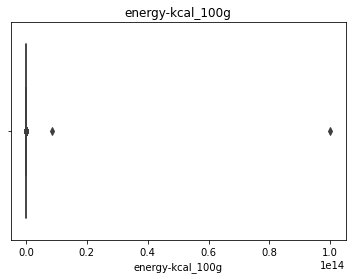

count    1.539649e+06
mean     7.065441e+07
std      8.089550e+10
min      0.000000e+00
25%      1.000000e+02
50%      2.600000e+02
75%      4.000000e+02
max      1.000000e+14
Name: energy-kcal_100g, dtype: float64


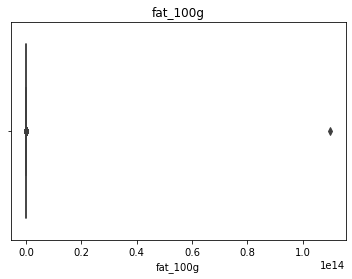

count    1.582827e+06
mean     6.949592e+07
std      8.743312e+10
min      0.000000e+00
25%      8.000000e-01
50%      7.000000e+00
75%      2.120000e+01
max      1.100000e+14
Name: fat_100g, dtype: float64


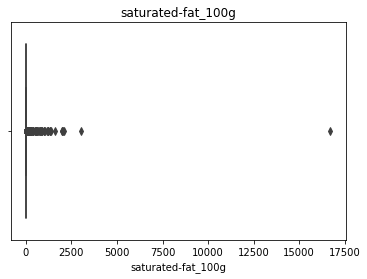

count    1.540038e+06
mean     5.107493e+00
std      1.660564e+01
min      0.000000e+00
25%      1.000000e-01
50%      1.800000e+00
75%      7.080000e+00
max      1.670000e+04
Name: saturated-fat_100g, dtype: float64


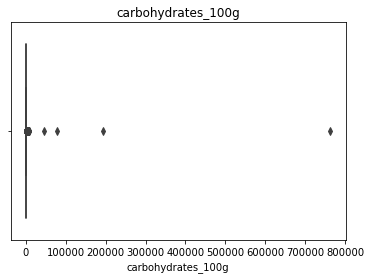

count    1.582567e+06
mean     2.885949e+01
std      6.302832e+02
min     -1.000000e+00
25%      3.500000e+00
50%      1.510000e+01
75%      5.300000e+01
max      7.629390e+05
Name: carbohydrates_100g, dtype: float64


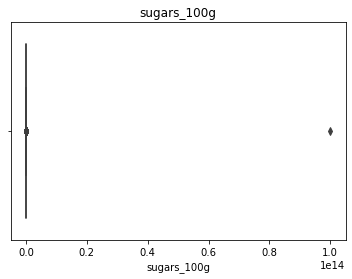

count    1.567241e+06
mean     6.380641e+07
std      7.987891e+10
min     -1.000000e+00
25%      6.000000e-01
50%      3.570000e+00
75%      1.760000e+01
max      1.000000e+14
Name: sugars_100g, dtype: float64


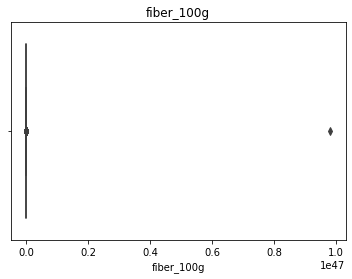

count    4.924120e+05
mean     1.992899e+41
std      1.398459e+44
min     -2.000000e+01
25%      0.000000e+00
50%      1.600000e+00
75%      3.600000e+00
max      9.813275e+46
Name: fiber_100g, dtype: float64


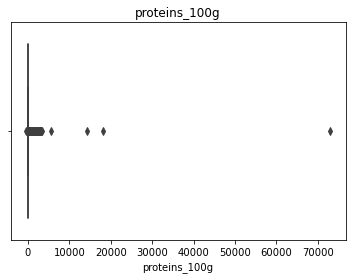

count    1.584111e+06
mean     8.798212e+00
std      6.263718e+01
min     -5.000000e+02
25%      1.300000e+00
50%      6.000000e+00
75%      1.247000e+01
max      7.300000e+04
Name: proteins_100g, dtype: float64


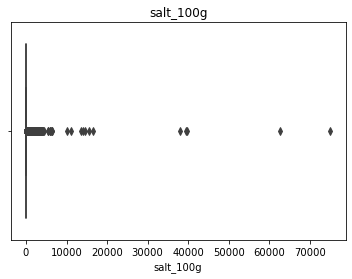

count    1.497193e+06
mean     2.168596e+00
std      1.067051e+02
min      0.000000e+00
25%      7.870000e-02
50%      5.750000e-01
75%      1.400000e+00
max      7.500000e+04
Name: salt_100g, dtype: float64


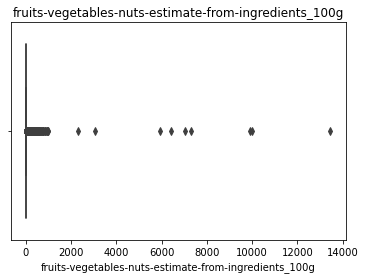

count    720980.000000
mean          8.477915
std          36.489084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.400000
max       13454.000000
Name: fruits-vegetables-nuts-estimate-from-ingredients_100g, dtype: float64


In [332]:
# Création des boîtes à moustache pour détecter les anomalies des variables quantitatives
for var in ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 
            'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
           'fruits-vegetables-nuts-estimate-from-ingredients_100g']:
    sns.boxplot(x=var, data=df)
    plt.title(var)
    plt.show()
    print(df[var].describe())

In [334]:
# Les données nutritives étant pour 100g, elles ne peuvent pas excéder 100g
# Supprimer les anormalies liées avec les données nutritives

cols = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', "fiber_100g", 'salt_100g', 
        "proteins_100g", 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

for col in cols : 
    ind = df.loc[(df[col] < 0) | (df[col] > 100)].index.to_list()
    df.drop(index=ind, inplace=True)
    
# Les aliments les plus caloriques ne peuvent contenir que 900 calories au maximum. 
# Supprimer les valeurs supérieures à 900 kcal et inférieure à 0 en ce qui concerne l'énergie en kcal.

cols = ["energy-kcal_100g"]

for col in cols : 
    ind = df.loc[(df[col] < 0) | (df[col] > 900)].index.to_list()
    df.drop(index=ind, inplace=True)

In [335]:
df.shape

(1975135, 25)

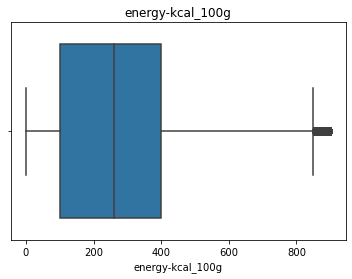

count    1.531069e+06
mean     2.704110e+02
std      1.912801e+02
min      0.000000e+00
25%      1.000000e+02
50%      2.590000e+02
75%      4.000000e+02
max      9.000000e+02
Name: energy-kcal_100g, dtype: float64


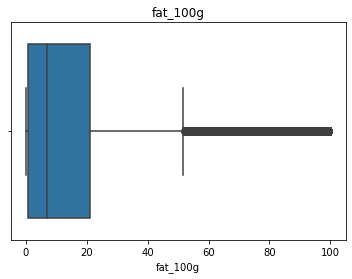

count    1.574133e+06
mean     1.364038e+01
std      1.762620e+01
min      0.000000e+00
25%      8.000000e-01
50%      7.000000e+00
75%      2.118000e+01
max      1.000000e+02
Name: fat_100g, dtype: float64


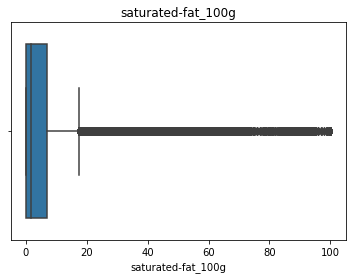

count    1.531731e+06
mean     5.055945e+00
std      7.759044e+00
min      0.000000e+00
25%      1.000000e-01
50%      1.800000e+00
75%      7.050000e+00
max      1.000000e+02
Name: saturated-fat_100g, dtype: float64


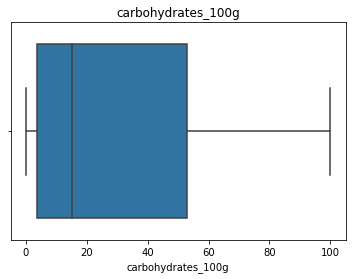

count    1.573914e+06
mean     2.804155e+01
std      2.794814e+01
min      0.000000e+00
25%      3.500000e+00
50%      1.510000e+01
75%      5.300000e+01
max      1.000000e+02
Name: carbohydrates_100g, dtype: float64


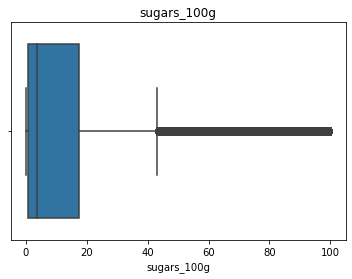

count    1.559009e+06
mean     1.304448e+01
std      1.936410e+01
min      0.000000e+00
25%      6.000000e-01
50%      3.570000e+00
75%      1.760000e+01
max      1.000000e+02
Name: sugars_100g, dtype: float64


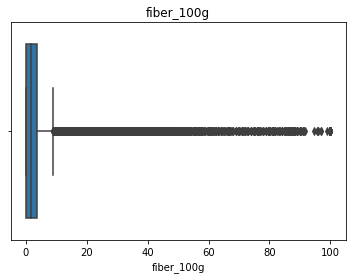

count    489849.000000
mean          3.019711
std           4.966856
min           0.000000
25%           0.000000
50%           1.600000
75%           3.600000
max         100.000000
Name: fiber_100g, dtype: float64


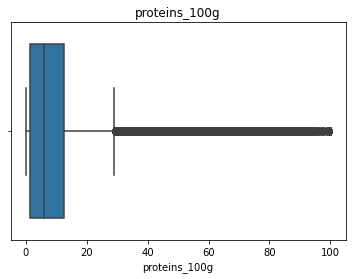

count    1.575444e+06
mean     8.653828e+00
std      9.893565e+00
min      0.000000e+00
25%      1.300000e+00
50%      6.000000e+00
75%      1.240000e+01
max      1.000000e+02
Name: proteins_100g, dtype: float64


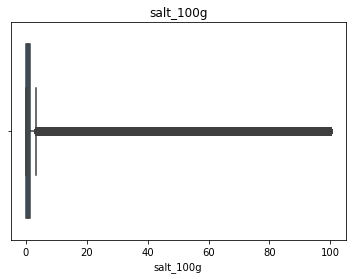

count    1.489553e+06
mean     1.339495e+00
std      4.660144e+00
min      0.000000e+00
25%      7.750000e-02
50%      5.700000e-01
75%      1.400000e+00
max      1.000000e+02
Name: salt_100g, dtype: float64


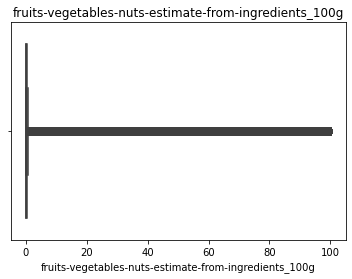

count    718318.000000
mean          8.117939
std          21.485171
min           0.000000
25%           0.000000
50%           0.000000
75%           0.300000
max         100.000000
Name: fruits-vegetables-nuts-estimate-from-ingredients_100g, dtype: float64


In [336]:
# vérifier les anomalies des variables quantitatives par des boîtes à moustache
for var in ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 
            'carbohydrates_100g','sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
           'fruits-vegetables-nuts-estimate-from-ingredients_100g']:
    sns.boxplot(x=var, data=df)
    plt.title(var)
    plt.show()
    print(df[var].describe())

In [305]:
# On crée une copie

df_clean_median = df.copy()

In [306]:
df_clean_median.isnull().mean() * 100

code                                                     71.245712
last_modified_datetime                                    0.000000
product_name                                              3.084194
categories                                               53.011769
brands                                                   48.068917
countries                                                 0.000000
additives_n                                              63.554998
ingredients_from_palm_oil_n                              63.554998
ingredients_that_may_be_from_palm_oil_n                  63.554998
nutriscore_score                                         63.609779
nutriscore_grade                                         63.609779
nova_group                                               68.185921
pnns_groups_1                                             0.000101
pnns_groups_2                                             0.000000
main_category                                            53.01

In [307]:
# Cette imputation est réaliser uniquement pour les valeurs numériques

for cols in df_clean_median.columns:
    if df_clean_median[cols].dtypes == "float64":
        df_clean_median[cols].loc[df_clean_median[cols].isna()] = df_clean_median.groupby('pnns_groups_2')[cols].transform('median')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [308]:
# Affichage du pourcentage de donneés manquantes

df_clean_median.isna().mean() * 100

code                                                     71.245712
last_modified_datetime                                    0.000000
product_name                                              3.084194
categories                                               53.011769
brands                                                   48.068917
countries                                                 0.000000
additives_n                                               0.000051
ingredients_from_palm_oil_n                               0.000051
ingredients_that_may_be_from_palm_oil_n                   0.000051
nutriscore_score                                          0.000051
nutriscore_grade                                         63.609779
nova_group                                                0.000051
pnns_groups_1                                             0.000101
pnns_groups_2                                             0.000000
main_category                                            53.01

In [309]:
# Supprimer les lignes manquantes liées avec les données nutritives

df_clean_median.dropna(subset = ['energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
                   'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
                   'fruits-vegetables-nuts-estimate-from-ingredients_100g'], inplace = True)

In [310]:
# créer une colonne pour le nombre possible d'ingrédient dérivé d'huil de palme

df_clean_median["palm_oil_total"] = df_clean_median["ingredients_from_palm_oil_n"] + df_clean_median["ingredients_that_may_be_from_palm_oil_n"]
df_clean_median.drop(['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n'], axis = 1, inplace = True)

In [311]:
# Affichage du pourcentage de donneés manquantes

df_clean_median.isnull().mean() * 100

code                                                     71.245748
last_modified_datetime                                    0.000000
product_name                                              3.084145
categories                                               53.011796
brands                                                   48.068891
countries                                                 0.000000
additives_n                                               0.000000
nutriscore_score                                          0.000000
nutriscore_grade                                         63.609760
nova_group                                                0.000000
pnns_groups_1                                             0.000101
pnns_groups_2                                             0.000000
main_category                                            53.012099
image_url                                                22.344256
energy-kcal_100g                                          0.00

<AxesSubplot:>

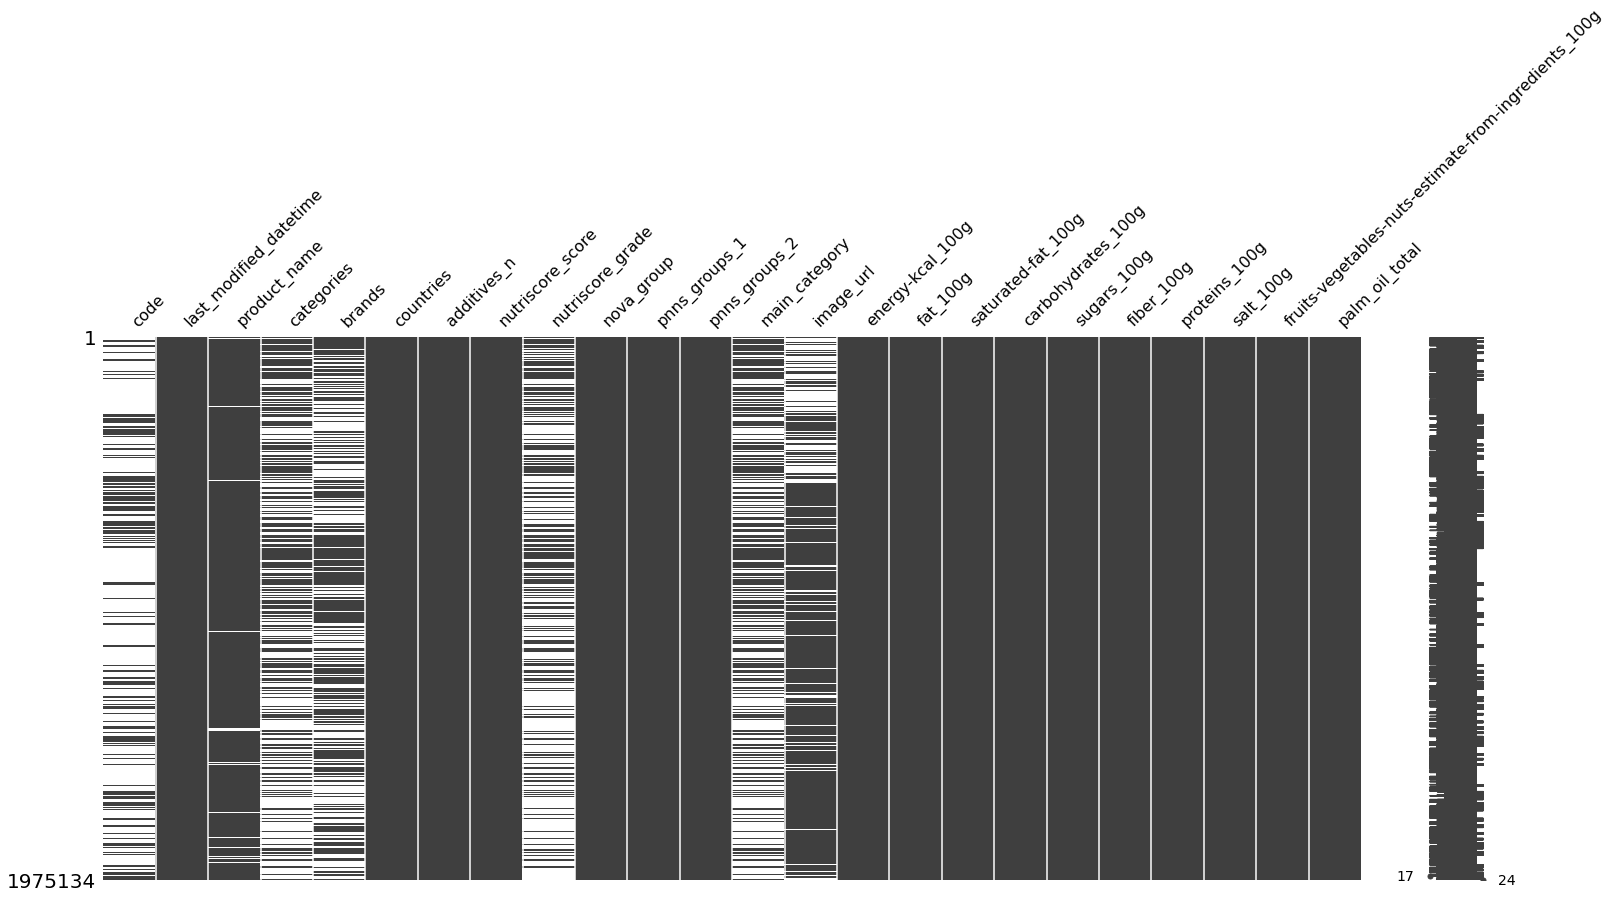

In [312]:
msno.matrix(df_clean_median)

In [313]:
df_clean_median.reset_index(drop = True)

,code,last_modified_datetime,product_name,categories,brands,countries,additives_n,nutriscore_score,nutriscore_grade,nova_group,...,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,palm_oil_total
0,00000000000000225,2021-06-16 14:53:29+00:00,Jeunes pousses,NaN,Endives,France,1.0,10.0,NaN,4.0,...,261.904762,7.02,1.70,17.57,3.57,2.2,6.1,0.575,0.0,0.0
1,00000000000003429145,2021-09-01 08:14:24+00:00,L.casei,NaN,NaN,Espagne,0.0,10.0,NaN,4.0,...,261.904762,1.40,0.90,9.80,9.80,2.2,2.7,0.100,0.0,0.0
2,0000000000017,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,France,1.0,10.0,NaN,4.0,...,375.000000,7.00,3.08,70.10,15.00,2.2,7.8,1.400,0.0,0.0
3,0000000000031,2018-10-13 21:06:57+00:00,Cacao,NaN,NaN,France,1.0,10.0,NaN,4.0,...,261.904762,7.02,1.70,17.57,3.57,2.2,6.1,0.575,0.0,0.0
4,000000000003327986,2021-06-22 19:39:25+00:00,Filetes de pollo empanado,NaN,NaN,Espagne,1.0,10.0,NaN,4.0,...,163.900000,1.90,1.00,17.57,3.57,2.2,15.3,1.100,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975129,NaN,2019-10-31 09:24:26+00:00,Sandwich club rillette poisson combava,NaN,NaN,France,1.0,10.0,NaN,4.0,...,261.904762,7.02,1.70,17.57,3.57,2.2,6.1,0.575,0.0,0.0
1975130,NaN,2020-12-16 07:58:24+00:00,Thé noir bio darjeeling,NaN,Pagès,France,1.0,10.0,NaN,4.0,...,261.904762,7.02,1.70,17.57,3.57,2.2,6.1,0.575,0.0,0.0
1975131,NaN,2020-02-25 15:24:07+00:00,Fati,NaN,NaN,Union européenne,1.0,10.0,NaN,4.0,...,24.000000,0.30,0.00,2.40,0.60,2.2,1.6,0.640,0.0,0.0
1975132,NaN,2021-02-12 11:35:30+00:00,Light & free skyr a boire,NaN,NaN,France,1.0,10.0,NaN,4.0,...,0.000000,0.20,0.10,8.00,7.80,2.2,5.5,0.150,0.0,0.0


In [314]:
df_clean_median.to_csv("openfoodfacts_clean_median.csv", index=False)